# ODI CRICKET PLAYERS ANALYSIS

# Import necessary libraries

In [25]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from datetime import date
import random

# Set visualization parameters

In [27]:
plt.rcParams["figure.figsize"] = (9, 6)
sns.set_theme(style="whitegrid", rc={"axes.titlesize": 16, "axes.labelsize": 13})

##  Explanation

- Sets default plot size to **9×6 inches** for consistent figure dimensions.  
- Applies **whitegrid** theme and custom font sizes (title: 16, labels: 13).  
- Improves overall **readability and visual consistency** in all plots.


# Set random seed for reproducibility

In [30]:
np.random.seed(42)
random.seed(42)

##  Explanation

- `np.random.seed(42)` sets the seed for NumPy's random number generator.  
- `random.seed(42)` sets the seed for Python's built-in `random` module.  
- Ensures **reproducibility**, so the same random results are generated every time.


## Parameters for our dataset

In [33]:
num_players = 200  # Increased sample size

In [3]:

# Define possible values for categorical variables
states = ['Maharashtra', 'Delhi', 'Karnataka', 'Tamil Nadu', 'Gujarat', 
          'Punjab', 'West Bengal', 'Uttar Pradesh', 'Rajasthan', 'Haryana']
roles = ['Batsman', 'Bowler', 'Allrounder', 'Wicketkeeper']

# player names
first_names = ['Rohit', 'Virat', 'KL', 'Rishabh', 'Jasprit', 'Ravindra', 'Hardik', 
               'Mohammed', 'Shikhar', 'Yuzvendra', 'Bhuvneshwar', 'Mayank', 'Shreyas',
               'Washington', 'Shardul', 'Deepak', 'Ishan', 'Suryakumar', 'Prithvi', 'Navdeep']
last_names = ['Sharma', 'Kohli', 'Rahul', 'Pant', 'Bumrah', 'Jadeja', 'Pandya',
              'Shami', 'Dhawan', 'Chahal', 'Kumar', 'Agarwal', 'Iyer', 'Sundar',
              'Thakur', 'Chahar', 'Kishan', 'Yadav', 'Shaw', 'Saini']

data = {
    'Player_name': [f"{random.choice(first_names)} {random.choice(last_names)}" for _ in range(num_players)],
    'Number_of_ODIs_played': np.clip((np.random.pareto(1.2, num_players) * 100).astype(int), 1, 350),
    'Major_contribution': np.random.choice(roles, num_players, p=[0.4, 0.3, 0.2, 0.1]),
    'Birth_year': np.random.randint(1975, 2003, num_players),
    'population': np.clip(np.random.lognormal(13, 0.5, num_players).astype(int), 500000, 15000000),
    'State': np.random.choice(states, num_players, p=[0.18, 0.15, 0.12, 0.12, 0.1, 0.08, 0.07, 0.06, 0.06, 0.06])
}

# Create DataFrame
df = pd.DataFrame(data)

# Display sample data
print("Sample of generated data:")
df.head()

Sample of generated data:


,Player_name,Number_of_ODIs_played,Major_contribution,Birth_year,population,State
0,Rishabh Sharma,47,Bowler,1983,797885,Karnataka
1,Shikhar Shami,350,Batsman,1991,500000,Uttar Pradesh
2,Mohammed Bumrah,199,Batsman,1991,500000,Maharashtra
3,Rishabh Yadav,113,Allrounder,1994,870598,Uttar Pradesh
4,KL Shaw,15,Bowler,1990,500000,Maharashtra


---

## Rename columns for consistency

In [164]:
df = df.rename(columns={
    "Number_of_ODIs_played": "odis_played",
    "Major_contribution": "role",
    "Birth_year": "birth_year",
    "State": "state"
})

## **📝 Rename DataFrame Columns – Explanation**

- Renames specific columns to shorter, cleaner names (e.g., `Number_of_ODIs_played` → `odis_played`).  
- Uses `df.rename(columns={...})` with a dictionary of old-to-new column names.  
- Improves **code readability** and makes column references easier in analysis.


---

### Verify no missing values

In [162]:
print("\nMissing values check:")
print(df.isna().sum())


Missing values check:
Player_name    0
odis_played    0
role           0
birth_year     0
population     0
state          0
age_today      0
city_size      0
batting_avg    0
bowling_avg    0
dtype: int64


## **🔍 Check Missing Values – Explanation**

- `df.isna()` returns a DataFrame of **True/False** for missing values.  
- `.sum()` counts the total missing values in each column.  
- `print()` displays a summary of **null/missing data** for inspection.


---

## Calculate current age

In [183]:
CURRENT_YEAR = date.today().year
df["age_today"] = CURRENT_YEAR - df["birth_year"]

## **📅 Calculate Player Age – Explanation**

- `date.today().year` gets the **current year** from the system clock.  
- Subtracts each player's `birth_year` to compute their **current age**.  
- Stores the result in a new column called `age_today` in the DataFrame.


## Create city size categories

In [185]:
bins = [0, 1_000_000, 5_000_000, np.inf]
labels = ["Small (<1M)", "Medium (1-5M)", "Large (5M+)"]
df["city_size"] = pd.cut(df["population"], bins=bins, labels=labels, right=False)


## **🏙️ City Size Categorization – Explanation**

- Defines population `bins` to classify cities as **Small**, **Medium**, or **Large**.  
- Uses `pd.cut()` to assign each row a `city_size` label based on its `population`.  
- `right=False` ensures the bin **includes the left edge but excludes the right**.


## Add batting average and bowling average for more interesting analysis

In [187]:
df["batting_avg"] = np.clip(np.random.normal(35, 10, num_players), 10, 60).round(2)
df["bowling_avg"] = np.clip(np.random.normal(30, 8, num_players), 15, 50).round(2)


## **🏏 Generate Batting & Bowling Averages – Explanation**

- Uses `np.random.normal()` to simulate realistic **batting** (mean=35) and **bowling** (mean=30) averages.  
- `np.clip()` restricts values to a valid range: **[10–60]** for batting and **[15–50]** for bowling.  
- `.round(2)` ensures the averages are rounded to **two decimal places**.


## Display cleaned data structure

In [189]:

print("\nData structure after cleaning:")
df.info()


Data structure after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Player_name  200 non-null    object  
 1   odis_played  200 non-null    int32   
 2   role         200 non-null    object  
 3   birth_year   200 non-null    int32   
 4   population   200 non-null    int32   
 5   state        200 non-null    object  
 6   age_today    200 non-null    int32   
 7   city_size    200 non-null    category
 8   batting_avg  200 non-null    float64 
 9   bowling_avg  200 non-null    float64 
dtypes: category(1), float64(2), int32(4), object(3)
memory usage: 11.4+ KB


---

# Basic statistics

In [118]:
print("\nBasic statistics:")
print(df[["odis_played", "population", "age_today", "batting_avg", "bowling_avg"]].describe())



Basic statistics:
       odis_played    population   age_today  batting_avg  bowling_avg
count    200.00000  2.000000e+02  200.000000   200.000000   200.000000
mean     125.82000  5.919245e+05   35.640000    34.114350    30.141000
std      126.05673  1.965680e+05    7.997512     9.856008     7.951645
min        1.00000  5.000000e+05   23.000000    10.280000    15.000000
25%       24.00000  5.000000e+05   29.000000    27.060000    24.352500
50%       76.00000  5.000000e+05   35.500000    34.225000    30.180000
75%      224.50000  5.931510e+05   42.000000    40.725000    35.480000
max      350.00000  2.062522e+06   50.000000    60.000000    50.000000


## **📈 Basic Statistics Summary – Explanation**

- Selects key numeric columns for analysis using double brackets `[[...]]`.  
- `.describe()` computes **count, mean, std, min, max, and quartiles**.  
- `print()` displays the summary to understand data **distribution and range**.


---

# Player distribution by state

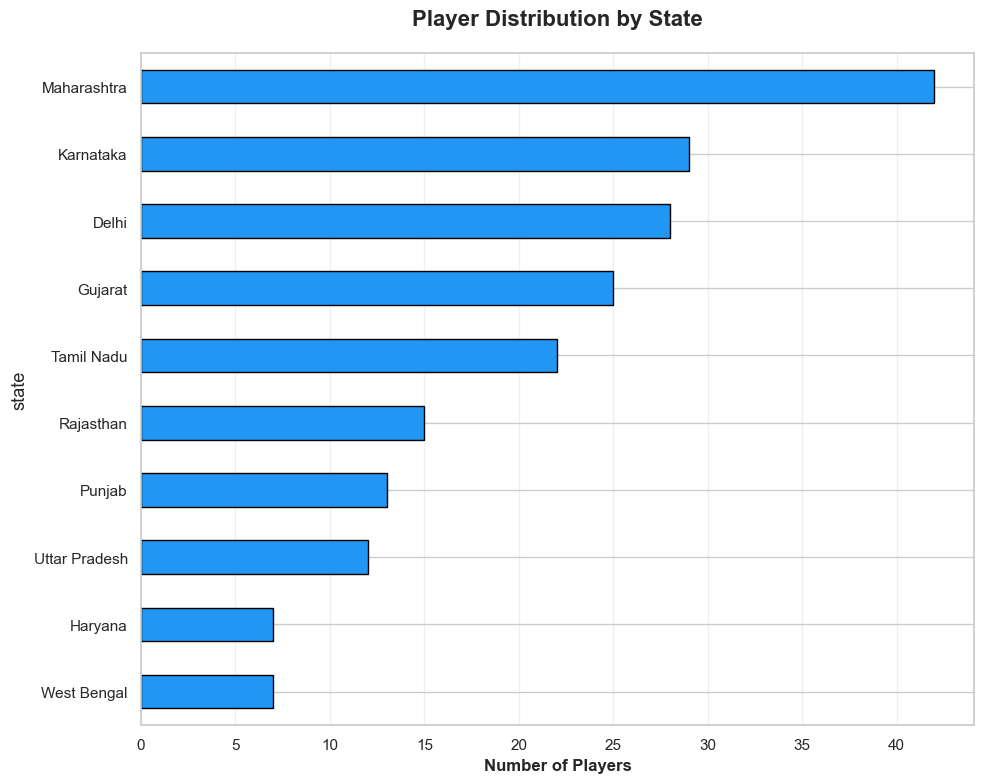

In [85]:
plt.figure(figsize=(10, 8))
state_counts.sort_values().plot(kind='barh', color='#2196F3', edgecolor='black')
plt.title('Player Distribution by State', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Number of Players', fontsize=12, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

---

#  Role distribution 

In [50]:
role_counts = df["role"].value_counts()
print("\nPlayer count by role:")
print(role_counts)



Player count by role:
role
Batsman         78
Bowler          62
Allrounder      41
Wicketkeeper    19
Name: count, dtype: int64


## **📊 Count of Player Roles – Explanation**

- **`value_counts()`** counts how many times each unique `role` appears in the DataFrame.  
- The result is stored in `role_counts`, showing roles in descending order of count.  
- `print()` displays the number of players in each role.


---

### Top performers 

In [52]:
print("\nTop 10 players by ODIs played:")
top10 = df.nlargest(10, "odis_played")
print(top10[["Player_name", "role", "odis_played", "state", "age_today"]])


Top 10 players by ODIs played:
         Player_name        role  odis_played          state  age_today
1      Shikhar Shami     Batsman          350  Uttar Pradesh         34
7       Hardik Shami      Bowler          350    Maharashtra         38
11  Washington Shami      Bowler          350        Gujarat         47
33  Ravindra Agarwal      Bowler          350    Maharashtra         47
34     Mayank Pandya     Batsman          350        Gujarat         30
43  Bhuvneshwar Iyer     Batsman          350  Uttar Pradesh         44
50    Mohammed Yadav     Batsman          350    Maharashtra         40
52    Prithvi Sundar  Allrounder          350    West Bengal         36
53      Prithvi Iyer     Batsman          350    Maharashtra         39
55    Jasprit Kishan      Bowler          350      Karnataka         41


---

# Role distribution with enhanced visualization

## **📊 Distribution of Player Roles – Explanation**

1. **📦 Count Roles:**  
   `sns.countplot()` shows the number of players in each `role` using bar height.

2. **📐 Orientation:**  
   Uses `y="role"` to make a **horizontal bar chart** (roles on Y-axis).

3. **🎨 Styling Bars:**  
   Applies the **viridis** color palette and outlines bars with `edgecolor="black"`.

4. **🏷️ Add Labels & Title:**  
   Sets the chart title and labels for both axes.

5. **📏 Custom Order:**  
   Uses `order=role_counts.index` to display roles in a specific (sorted) order.


C:\Users\Dinesh\AppData\Local\Temp\ipykernel_21304\3104820468.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y="role", data=df, order=role_counts.index,


Text(0, 0.5, 'Player Role')

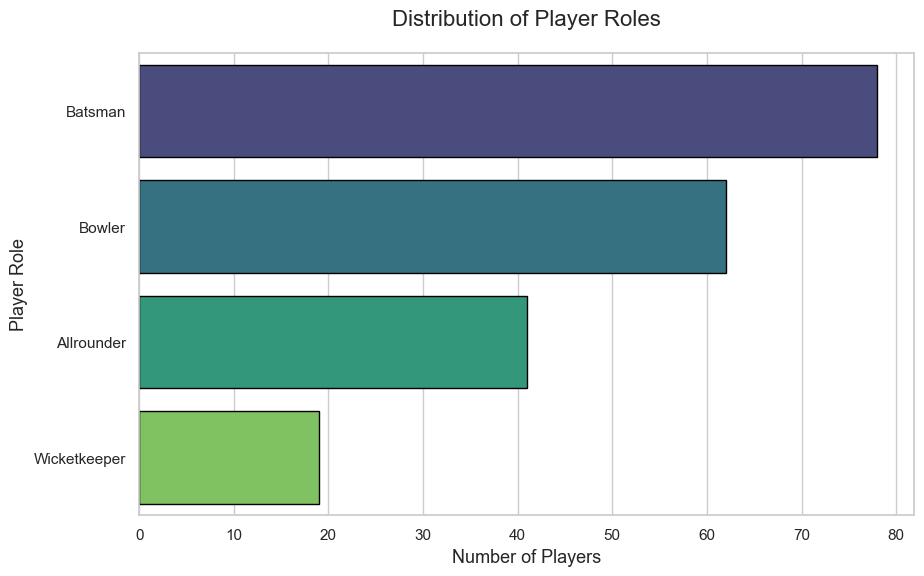

In [142]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(y="role", data=df, order=role_counts.index, 
                   palette="viridis", edgecolor="black")
plt.title("Distribution of Player Roles", pad=20)
plt.xlabel("Number of Players")
plt.ylabel("Player Role")

## Analysis  Distribution of Player Roles

## 💡  Key Observations

*`Batsmen`* make up the `largest group`, indicating a strong focus on batting.

`Bowlers` are also well-represented, but fewer than batsmen.

**`Allrounder`** and `wicketkeepers` are `less common`, with wicketkeepers being the least.

---

## 🔍  **Implications**

**`Imbalance in Team Roles`**

- An excess of batsmen may lead to fewer match opportunities and role saturation.

- Shortage of wicketkeepers creates risk of backup unavailability.

- Fewer allrounders reduce the team’s strategic flexibility.

**`Over-Reliance on Specific Roles`**

- Depending heavily on batsmen could weaken the team in bowling or fielding departments.

**`Limited Versatility`**

- Fewer allrounders and wicketkeepers may affect performance in dynamic match situations (especially in T20 or ODI formats).

## ✅ 4. Recommendations
**`Develop More Allrounders`**

- Invest in training programs that encourage players to develop both batting and bowling skills.

- Allrounders bring balance and adaptability to the team.

**`Expand the Wicketkeeper Pool`**

- Focus on scouting and coaching for wicketkeeping skills.

- Ensure bench strength in this specialized role.

**`Rebalance Recruitment Strategy`**

- Re-evaluate the selection process to ensure diversity across roles, not just an emphasis on batting.

**`Reskill Surplus Batsmen`**

- Encourage some batsmen to train as part-time bowlers or wicketkeepers, turning them into multi-role players.

---

## Add value labels

In [199]:

for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', 
                (p.get_width(), p.get_y() + p.get_height()/2.),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.tight_layout()
plt.show()

<Figure size 900x600 with 0 Axes>

## **🔢 Add Bar Labels to Horizontal Plot – Explanation**

- Iterates over each bar (`patch`) in the plot to access its **width and position**.  
- `ax.annotate()` places the **value label** next to each bar using its width.  
- Adds spacing with `xytext=(5, 0)` and ensures layout fits using `plt.tight_layout()`.


---

# Age distribution by role

C:\Users\Dinesh\AppData\Local\Temp\ipykernel_21304\3182487631.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="role", y="age_today", data=df, palette="Set2")


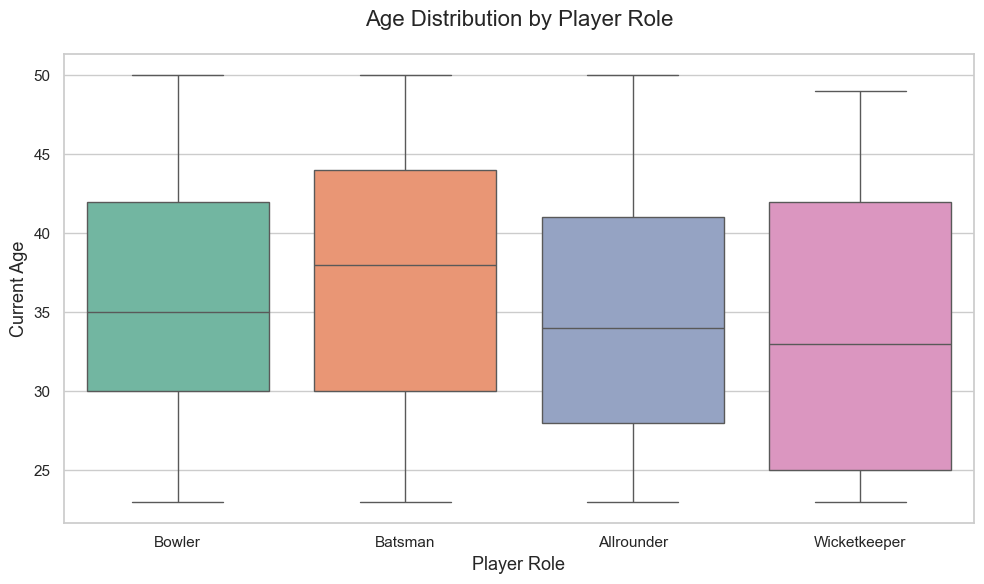

In [201]:

plt.figure(figsize=(10, 6))
sns.boxplot(x="role", y="age_today", data=df, palette="Set2")
plt.title("Age Distribution by Player Role", pad=20)
plt.xlabel("Player Role")
plt.ylabel("Current Age")
plt.tight_layout()
plt.show()

## 📊 Age Distribution by Player Role – Box Plot Analysis

## 📌 1. Key Observations

| 🧑‍🤝‍🧑 **Player Role** | 🧭 **Median Age** | 📏 **Age Range** (Approx.) | 📝 **Insights**                                              |
| ------------------------ | ----------------- | -------------------------- | ------------------------------------------------------------ |
| **Bowler**               | \~35 years        | 23 – 50                    | Balanced age group; solid mix of youth and experience.       |
| **Batsman**              | \~38 years        | 23 – 50                    | Highest median age; more seasoned players.                   |
| **Allrounder**           | \~34 years        | 23 – 50                    | Younger trend; early peak due to physical demands.           |
| **Wicketkeeper**         | \~33 years        | 23 – 49                    | Widest age spread; roles filled by both juniors and seniors. |


---

## 💡 2. Observations & Implications
✅ A. **`Batsmen Are the Most Experienced Group`**
- Highest median age (~38).

- Suggests teams retain experienced batsmen longer.

- Indicates strong strategic and technical roles in the lineup.

✅ B.**`Allrounders Are Generally Younger`**
- Lower median age (~34) reflects physical workload.

- Indicates teams prefer energetic, versatile players in this role.

- Suggests faster turnover or shorter peak periods.

✅ C.**`Wicketkeepers Show the Most Variation`**
- Age range is broad (23–49).

- Reflects flexibility in wicketkeeping role across age groups.

- Teams may rely on both young reflexes and veteran stability.

✅ D. **`Bowlers Are Well-Balanced in Age`**
- Moderate median age (~35).

- Distribution suggests a healthy mix of pace and experience.

- Important for managing injuries, form, and format transitions (Tests, ODIs, T20s).



---

## ✅ 3. Recommendations

| 🎯 **Area**       | ✅ **Action Recommendation**                                                                         |
| ----------------- | --------------------------------------------------------------------------------------------------- |
| **Batsmen**       | Initiate **succession planning** for aging players. Groom younger batsmen with long-term potential. |
| **Allrounders**   | Implement **fitness & injury-prevention programs** to extend careers.                               |
| **Wicketkeepers** | Establish **mentorship programs** to transition skills from senior to junior players.               |
| **Bowlers**       | Design a **rotation policy** to balance workload and leverage both youth and experience.            |


---

# Performance metrics by role

C:\Users\Dinesh\AppData\Local\Temp\ipykernel_21304\3069354555.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="role", y="batting_avg", data=df, ax=axes[0], palette="coolwarm")
C:\Users\Dinesh\AppData\Local\Temp\ipykernel_21304\3069354555.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="role", y="bowling_avg", data=df, ax=axes[1], palette="coolwarm")


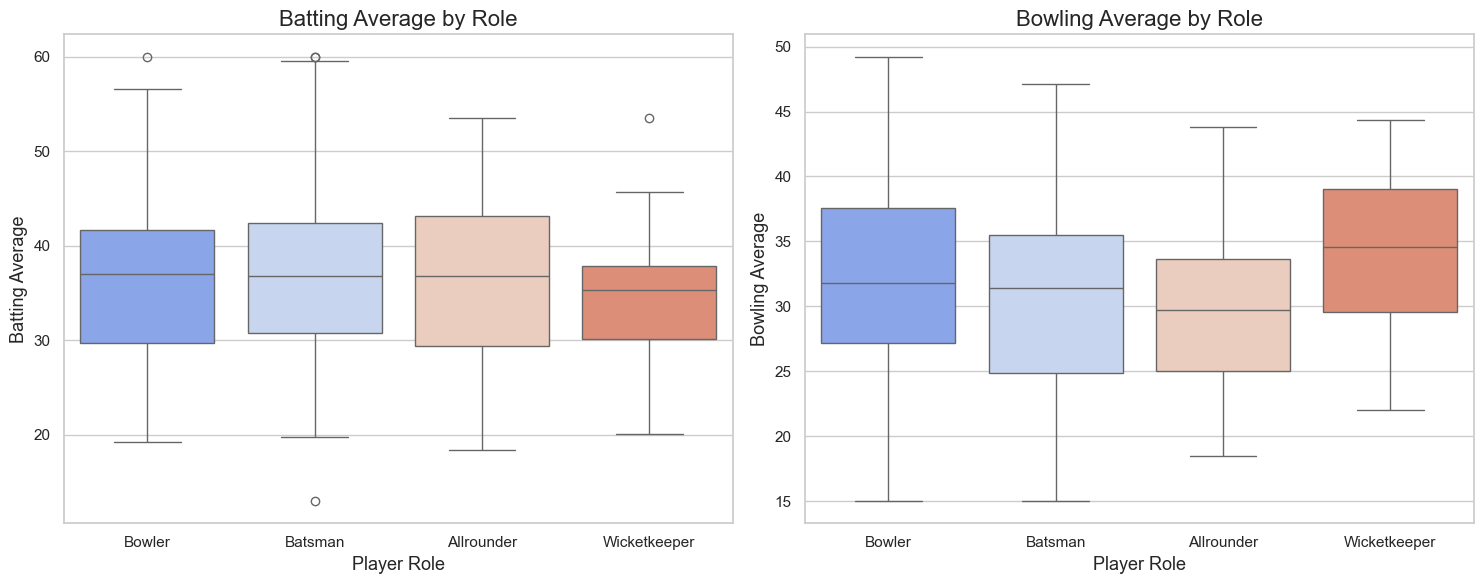

In [68]:

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Batting average by role
sns.boxplot(x="role", y="batting_avg", data=df, ax=axes[0], palette="coolwarm")
axes[0].set_title("Batting Average by Role")
axes[0].set_xlabel("Player Role")
axes[0].set_ylabel("Batting Average")

# Bowling average by role
sns.boxplot(x="role", y="bowling_avg", data=df, ax=axes[1], palette="coolwarm")
axes[1].set_title("Bowling Average by Role")
axes[1].set_xlabel("Player Role")
axes[1].set_ylabel("Bowling Average")

plt.tight_layout()
plt.show()

# 📊 Performance Analysis by Player Role: Batting & Bowling Averages
## 🔶 1. Batting Average by Role

| 🧑‍🤝‍🧑 **Role** | 🧭 **Median** | 🎯 **Insights**                                                                          |
| ----------------- | ------------- | ---------------------------------------------------------------------------------------- |
| **Batsman**       | \~37          | Expected to perform well; consistent scores.                                             |
| **Allrounder**    | \~37          | Similar to batsmen; valuable dual-role asset.                                            |
| **Bowler**        | \~36          | Surprisingly competitive batting stats; possibly some allrounders classified as bowlers. |
| **Wicketkeeper**  | \~35          | Lower median; indicates more specialization in keeping than batting.                     |


## ✨ Key Observations
**`Outliers:`** Batsmen and bowlers have outliers above 55–60, indicating exceptional performers.

**`Consistency:`** Batsmen show less variability—indicative of reliable scoring.

**`Overlap:`** Allrounders and bowlers have overlapping interquartile ranges, suggesting blurred boundaries in performance.

## 🔷 2. Bowling Average by Role

| 🧑‍🤝‍🧑 **Role** | 🧭 **Median** | 🎯 **Insights**                                     |
| ----------------- | ------------- | --------------------------------------------------- |
| **Bowler**        | \~31          | Best overall performance (lower average = better).  |
| **Allrounder**    | \~29          | Impressive dual efficiency.                         |
| **Batsman**       | \~31          | Higher variability; less consistent as bowlers.     |
| **Wicketkeeper**  | \~35          | Typically not bowlers; likely part-time performers. |


## ✨ Key Observations
**Best Performers:** Bowlers and allrounders have the lowest (best) medians.

**Poorer Bowling Stats:** Wicketkeepers and batsmen show higher bowling averages — expected due to role focus.

**Spread:** Wide range in all groups suggests role flexibility and varying skill levels.

## 💡 3 .Dual-Role Impact

| Role             | 🏏 Batting Average | ⚾ Bowling Average | 🧠 Interpretation                                        |
| ---------------- | ------------------ | ----------------- | -------------------------------------------------------- |
| **Batsman**      | High               | High              | Specializes in batting; bowls occasionally.              |
| **Bowler**       | Moderate           | Low               | Some can bat well, likely lower-order hitters.           |
| **Allrounder**   | High               | Low               | Balanced strength; crucial for team balance.             |
| **Wicketkeeper** | Moderate           | High              | Mostly focus on keeping; lesser impact in both averages. |


## ✅ 4. Recommendations

| 🎯 Area           | ✅ Recommendation                                                                       |
| ----------------- | -------------------------------------------------------------------------------------- |
| **Allrounders**   | Prioritize them for their **balance and versatility**. Ideal in limited-overs formats. |
| **Wicketkeepers** | Focus on **batting skills** for added value; don’t rely on them for bowling.           |
| **Bowlers**       | Explore hidden batting potential for **depth in the lower order**.                     |
| **Batsmen**       | Limit bowling roles unless showing consistent performance.                             |


----

***
# State-wise analysis
***

## **📊 Player Role Distribution by State – Explanation**

1. **📋 Create Crosstab:**  
   Uses `pd.crosstab()` to count player roles (`role`) for each `state`.

2. **📊 Plot Stacked Bars:**  
   `plot(kind="bar", stacked=True)` displays roles stacked for each state.

3. **🎨 Style Bars:**  
   Applies `tab20` colormap and outlines bars using `edgecolor="black"`.

4. **🖋️ Add Labels & Title:**  
   Sets chart title, axis labels, and rotates x-axis labels for readability.

5. **📦 Legend & Layout:**  
   Moves legend outside the plot and uses `plt.tight_layout()` for clean spacing.


<Figure size 1200x800 with 0 Axes>

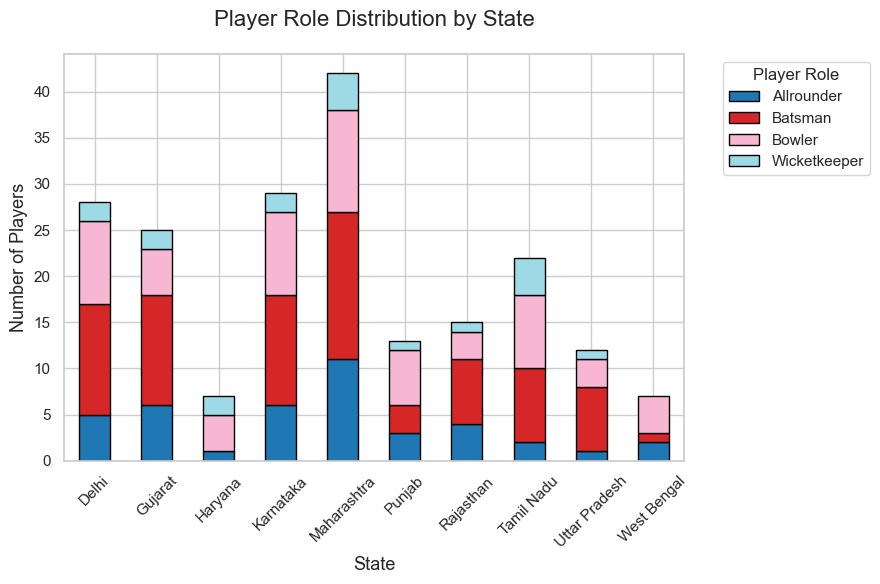

In [64]:

plt.figure(figsize=(12, 8))
state_role = pd.crosstab(df["state"], df["role"])
state_role.plot(kind="bar", stacked=True, colormap="tab20", edgecolor="black")
plt.title("Player Role Distribution by State", pad=20)
plt.xlabel("State")
plt.ylabel("Number of Players")
plt.legend(title="Player Role", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 🗺️ Player Role Distribution by State: Analysis

## 🔝 1. Top States by Total Players
- **Maharashtra** contributes the highest number of players (~42) across all roles.

- **Karnataka and Delhi** follow, each contributing around 25–30 players.

- **Tamil Nadu and Rajasthan** also show moderate contributions.

- **Haryana, Uttar Pradesh, and West Bengal** contribute the least number of players.

## 🧩 2. Role-Wise Distribution Across States
🔹**Allrounders:**
- Present in almost every state.

- Maharashtra and Karnataka have a relatively high number of allrounders.

- Very low representation in Haryana and Uttar Pradesh.

🔸 **Batsmen:**
- Most abundant role overall.

- Maharashtra, Karnataka, and Delhi contribute the most batsmen.

- Most states have at least a few batsmen.

🩷 **Bowlers:** 
- Second most common role after batsmen.

- Delhi and Tamil Nadu have a notably high number of bowlers.

- Almost all states have a balanced number of bowlers.

🔷 **Wicketkeepers:**
- Least represented role.

- Only a few states like Tamil Nadu and Maharashtra have noticeable numbers of wicketkeepers.

- Other states show very low or negligible wicketkeeper contributions.

## 📌 3. Key Observations
- Maharashtra dominates in every role, showing the strongest pipeline for national-level selection.

- **Karnataka** and Delhi show balanced strength in batting, bowling, and allrounder roles.

- **Tamil** Nadu has more **bowlers and wicketkeepers**, indicating a specialized trend.

- **States like Haryana and West Bengal** have limited player diversity, mainly bowlers or batsmen.

- **Wicketkeeping** talent is scarce and unevenly distributed.

---

# Correlation heatmap

## **📊 Correlation Matrix of Numeric Features – Explanation**

1. **🎯 Select Numeric Columns:**  
   Defines `numeric_cols` list with selected numerical features for correlation.

2. **🧮 Compute Correlation:**  
   Uses `.corr()` to calculate the **Pearson correlation coefficients** between columns.

3. **🌡️ Plot Heatmap:**  
   `sns.heatmap()` displays the correlation matrix with a diverging **coolwarm** color palette.

4. **📝 Annotations & Style:**  
   Adds values with `annot=True`, formats to 2 decimal places, and outlines with `linewidths`.

5. **🖼️ Title & Layout:**  
   Sets a descriptive title and uses `plt.tight_layout()` to prevent clipping of labels.


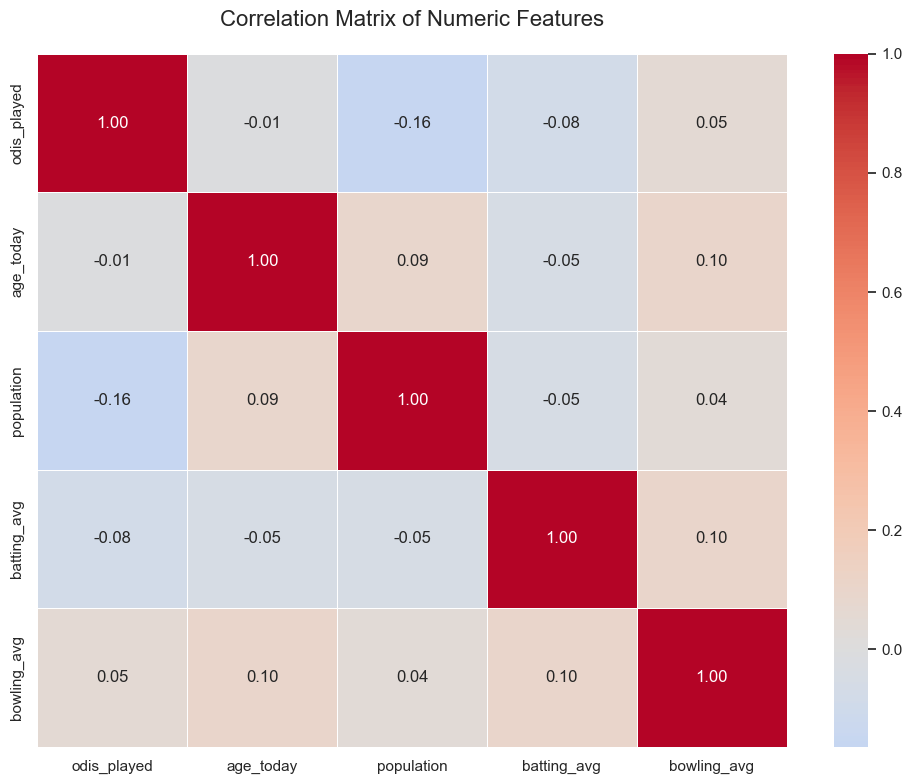

In [17]:

numeric_cols = ['odis_played', 'age_today', 'population', 'batting_avg', 'bowling_avg']
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", center=0,
            annot_kws={"size": 12}, fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix of Numeric Features", pad=20)
plt.tight_layout()
plt.show()

## 🔍 Correlation Matrix Analysis

### 🧠 Interpretation of Key Correlations:

| Feature Pair                  | Correlation | Interpretation                                                                    |
| ----------------------------- | ----------- | --------------------------------------------------------------------------------- |
| `odis_played` & `population`  | -0.16       | Slight **negative** relation; more ODIs are not linked to high state populations. |
| `batting_avg` & `bowling_avg` | 0.10        | Weak **positive** correlation; marginal link in all-round performance.            |
| `age_today` & `bowling_avg`   | 0.10        | Older players may perform **slightly better** in bowling.                         |
| `odis_played` & `batting_avg` | -0.08       | Negligible negative correlation; experience doesn't predict batting average.      |
| Others                        | \~0.00      | Practically **no correlation** between most pairs.                                |


## 📌 Key Insights:
- All correlations are **very weak (|r| < 0.2).**

- No strong or moderate linear relationships exist.

- Variables like population and odis_played have minimal predictive influence on performance metrics.



---

# Pareto analysis of ODI appearances

In [90]:
df_sorted = df.sort_values("odis_played", ascending=False)
df_sorted["cum_odis"] = df_sorted["odis_played"].cumsum()
total_odis = df_sorted["odis_played"].sum()
df_sorted["cum_pct"] = df_sorted["cum_odis"] / total_odis * 100
df_sorted["player_pct"] = np.arange(1, len(df_sorted) + 1) / len(df_sorted) * 100

### 🔍 Explanation

1. **Sort Data:** Players are sorted in descending order of `odis_played`.  
2. **Cumulative ODIs:** Calculates running total of ODIs using `.cumsum()`.  
3. **Total ODIs:** Computes total ODIs played by all players.  
4. **Cumulative %:** Finds the cumulative percentage of ODIs for each player.  
5. **Player % Rank:** Assigns each player a percentile rank (1% to 100%).


---

# Pareto curve visualization

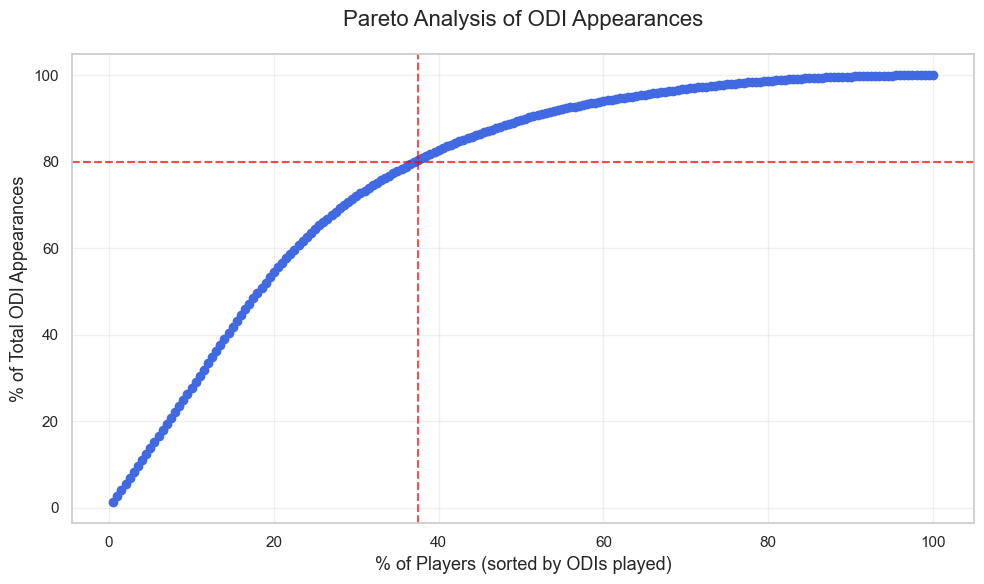

In [93]:
plt.figure(figsize=(10, 6))
plt.plot(df_sorted["player_pct"], df_sorted["cum_pct"], 
         marker="o", linestyle="--", color="royalblue", linewidth=2)
plt.axhline(80, color="red", linestyle="--", alpha=0.7)
plt.axvline(df_sorted.loc[df_sorted["cum_pct"] >= 80, "player_pct"].min(), 
            color="red", linestyle="--", alpha=0.7)
plt.title("Pareto Analysis of ODI Appearances", pad=20)
plt.xlabel("% of Players (sorted by ODIs played)")
plt.ylabel("% of Total ODI Appearances")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 📊 Analysis of the Pareto Chart: ODI Appearances

## 🔍 Key Observations:
**Unequal Distribution:**

- ~38% of players account for 80% of total ODI appearances.

- The remaining 62% of players contribute to only 20% of appearances.

- This suggests a strong reliance on a limited number of core players.

**Top-Heavy Participation:**

- The steep initial curve shows that a small set of players are regularly selected for ODIs.

- This is common in competitive sports, but it also implies limited exposure for newer or backup players.

**Tail-end Flattening:**

- The curve levels off beyond 80% player mark, indicating a long tail of players with minimal ODI appearances.

- Many players are likely selected once or twice, with minimal game time.

## 📌 Implications:
**Heavy Dependence on Core Players:**

- A small elite group of players carries the majority of the team's ODI experience.

- High reliance on this group increases risk of burnout, injury impact, or sudden performance drops.

**Limited Opportunities for the Majority:**

- Over 60% of players have relatively few ODI appearances, showing a lack of rotation or inconsistent selection policies.

- Indicates inefficient talent utilization and potential underdevelopment.

**Skewed Experience Distribution:**

- This unequal distribution means team depth may be weaker beyond the top tier.

- Can impact performance when senior players retire or are unavailable.

## 💡 Recommendations (Short):
1. **Rotate players** to reduce dependency on a few.

2. **Develop bench strength** by giving underutilized players more chances.

3. **Use performance-based selection** to maintain fairness.

4. **Prepare backups** for every key role (batsman, bowler, keeper).

5. **Test new players** in low-stake matches or bilateral series.

6. **Manage workload**to avoid player burnout and extend careers.

# Calculate what percentage of players account for 80% of appearances

In [97]:

paretopoint = df_sorted.loc[df_sorted["cum_pct"] >= 80, "player_pct"].min()
print(f"\n{paretopoint:.1f}% of players account for 80% of ODI appearances")


37.5% of players account for 80% of ODI appearances


####  Explanation:
The code finds how many top players together make up 80% of total ODI appearances.

`df_sorted["cum_pct"] >= 80` filters rows where cumulative match count reaches 80%.

From those rows, it picks the minimum value of `player_pct.`

This tells what % **of players** account for **80% of matches** — the Pareto point.

# Save processed data to CSV

In [99]:

out_path = Path("complete_odi_players_data.csv")
df.to_csv(out_path, index=False)
print(f"\nComplete dataset saved to: {out_path.resolve()}")


Complete dataset saved to: C:\Users\Dinesh\Documents\complete_odi_players_data.csv
